In [284]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [298]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [299]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

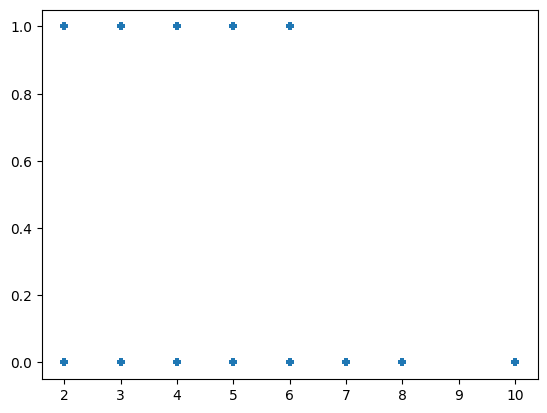

In [300]:
plt.scatter(df.time_spend_company,df.left,marker="+")

In [221]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [222]:
satisfaction = df['left'].groupby(df.satisfaction_level).mean()
satisfaction.sample(10)

satisfaction_level
0.88    0.133690
0.35    0.081081
1.00    0.000000
0.59    0.031963
0.18    0.000000
0.40    0.808612
0.79    0.207373
0.91    0.191964
0.45    0.773399
0.65    0.005025
Name: left, dtype: float64

In [223]:
last_evaluation_data = df['left'].groupby(df.last_evaluation).mean() 
last_evaluation_data

last_evaluation
0.36    0.000000
0.37    0.000000
0.38    0.000000
0.39    0.000000
0.40    0.000000
          ...   
0.96    0.269076
0.97    0.304348
0.98    0.243346
0.99    0.255814
1.00    0.590106
Name: left, Length: 65, dtype: float64

In [224]:
number_project_data = df['left'].groupby(df.number_project).mean()
number_project_data.value_counts

<bound method IndexOpsMixin.value_counts of number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64>

In [225]:
df['left'].groupby(df.average_montly_hours).mean().tail(10)


average_montly_hours
301    1.0
302    1.0
303    1.0
304    1.0
305    1.0
306    1.0
307    1.0
308    1.0
309    1.0
310    1.0
Name: left, dtype: float64

In [190]:
df['left'].groupby(df.time_spend_company).value_counts()

time_spend_company  left
2                   0       3191
                    1         53
3                   0       4857
                    1       1586
4                   0       1667
                    1        890
5                   1        833
                    0        640
6                   0        509
                    1        209
7                   0        188
8                   0        162
10                  0        214
Name: count, dtype: int64

In [226]:
df['left'].groupby(df.Work_accident).mean()

Work_accident
0    0.265160
1    0.077916
Name: left, dtype: float64

In [227]:
df[['Work_accident','left']].tail()

,Work_accident,left
14994,0,1
14995,0,1
14996,0,1
14997,0,1
14998,0,1


In [193]:
df['left'].groupby(df.promotion_last_5years).value_counts()

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: count, dtype: int64

In [228]:
df['left'].groupby(df.Department).value_counts()

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: count, dtype: int64

In [195]:
 df['left'].groupby(df.salary).mean()

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

<Axes: xlabel='salary', ylabel='left'>

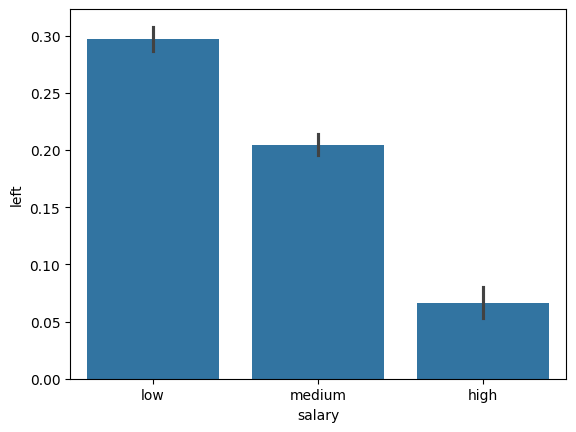

In [196]:
sn.barplot(x='salary',y='left',data=df)

<Axes: xlabel='Department', ylabel='left'>

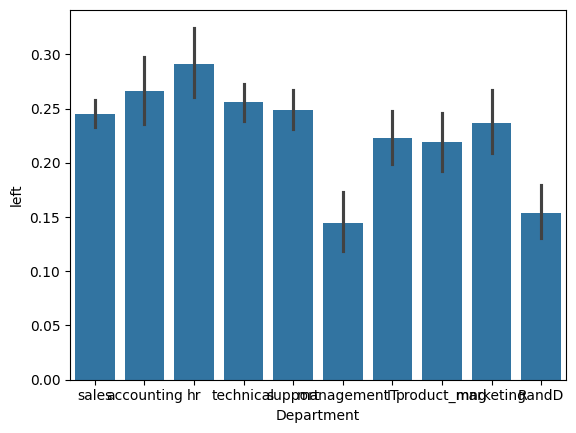

In [229]:
sn.barplot(x='Department',y='left',data=df)

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [302]:
X = df[['satisfaction_level','average_montly_hours','salary']]
y = df.left
X,y


(       satisfaction_level  average_montly_hours  salary
 0                    0.38                   157     low
 1                    0.80                   262  medium
 2                    0.11                   272  medium
 3                    0.72                   223     low
 4                    0.37                   159     low
 ...                   ...                   ...     ...
 14994                0.40                   151     low
 14995                0.37                   160     low
 14996                0.37                   143     low
 14997                0.11                   280     low
 14998                0.37                   158     low
 
 [14999 rows x 3 columns],
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 14994    1
 14995    1
 14996    1
 14997    1
 14998    1
 Name: left, Length: 14999, dtype: int64)

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [304]:
X_train

,satisfaction_level,average_montly_hours,salary
4674,0.74,255,medium
12793,0.62,156,medium
9554,0.62,134,medium
13359,0.72,179,low
7001,0.63,215,medium
...,...,...,...
10095,0.77,224,low
2581,0.63,152,low
38,0.11,306,low
3102,0.97,225,medium


In [305]:
X_train.salary = le.fit_transform(X_train.salary)
X_test.salary = le.fit_transform(X_test.salary)

In [306]:
X_test

,satisfaction_level,average_montly_hours,salary
13682,0.84,209,1
6433,0.70,180,2
10631,0.60,165,2
5049,0.60,265,2
2777,0.89,141,1
...,...,...,...
7533,0.61,160,0
684,0.42,202,2
6250,0.49,136,2
196,0.27,278,1


In [307]:
X_train = X_train.values
X_test = X_test.values

In [308]:
X_test

array([[8.40e-01, 2.09e+02, 1.00e+00],
       [7.00e-01, 1.80e+02, 2.00e+00],
       [6.00e-01, 1.65e+02, 2.00e+00],
       ...,
       [4.90e-01, 1.36e+02, 2.00e+00],
       [2.70e-01, 2.78e+02, 1.00e+00],
       [7.30e-01, 2.52e+02, 2.00e+00]])

In [309]:
ct = ColumnTransformer([('salary',OneHotEncoder(),[2])],remainder = 'passthrough')

In [310]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)
X_train,X_test

(array([[0.00e+00, 0.00e+00, 1.00e+00, 7.40e-01, 2.55e+02],
        [0.00e+00, 0.00e+00, 1.00e+00, 6.20e-01, 1.56e+02],
        [0.00e+00, 0.00e+00, 1.00e+00, 6.20e-01, 1.34e+02],
        ...,
        [0.00e+00, 1.00e+00, 0.00e+00, 1.10e-01, 3.06e+02],
        [0.00e+00, 0.00e+00, 1.00e+00, 9.70e-01, 2.25e+02],
        [0.00e+00, 1.00e+00, 0.00e+00, 5.50e-01, 1.62e+02]]),
 array([[0.00e+00, 1.00e+00, 0.00e+00, 8.40e-01, 2.09e+02],
        [0.00e+00, 0.00e+00, 1.00e+00, 7.00e-01, 1.80e+02],
        [0.00e+00, 0.00e+00, 1.00e+00, 6.00e-01, 1.65e+02],
        ...,
        [0.00e+00, 0.00e+00, 1.00e+00, 4.90e-01, 1.36e+02],
        [0.00e+00, 1.00e+00, 0.00e+00, 2.70e-01, 2.78e+02],
        [0.00e+00, 0.00e+00, 1.00e+00, 7.30e-01, 2.52e+02]]))

In [311]:
X_train = X_train[:,1:]
X_test = X_test[:,1:]

In [312]:
X_test

array([[1.00e+00, 0.00e+00, 8.40e-01, 2.09e+02],
       [0.00e+00, 1.00e+00, 7.00e-01, 1.80e+02],
       [0.00e+00, 1.00e+00, 6.00e-01, 1.65e+02],
       ...,
       [0.00e+00, 1.00e+00, 4.90e-01, 1.36e+02],
       [1.00e+00, 0.00e+00, 2.70e-01, 2.78e+02],
       [0.00e+00, 1.00e+00, 7.30e-01, 2.52e+02]])

In [313]:
model = LogisticRegression()

In [314]:
model.fit(X_train,y_train)

LogisticRegression()

In [315]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [319]:
y_test.values

array([0, 0, 0, ..., 0, 1, 1])

In [320]:
model.score(X_test,y_test)

0.7746666666666666